In [2]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator

In [3]:
# load data
df = pd.read_csv('cancer patient data sets.csv')

df.head()

x1 = np.asarray(df.Age)
x2 = np.asarray(df.Smoking)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

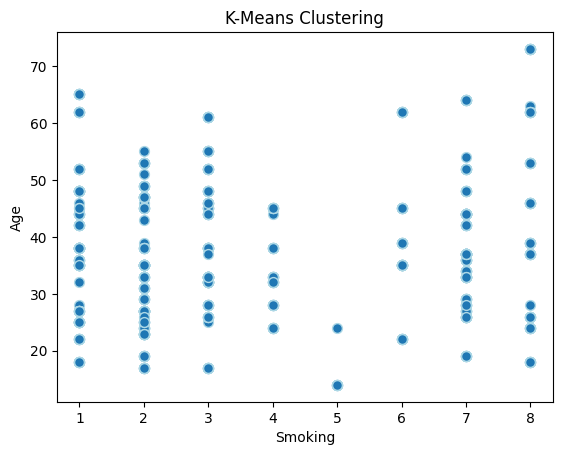

In [4]:
# plot the data
plt.scatter(x2, x1, s=50, edgecolors= "lightblue")
plt.xlabel("Smoking")
plt.ylabel("Age")
plt.title("K-Means Clustering")

plt.show()

In [93]:
# train K-Means clustering
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

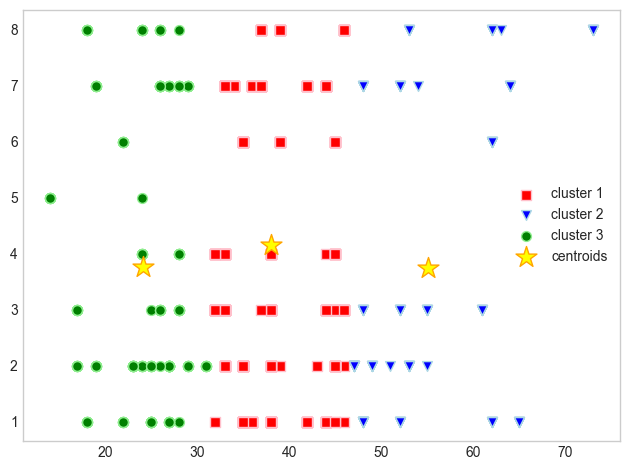

In [96]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='red',
    marker='s', edgecolor='pink',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='blue',
    marker='v', edgecolor='lightblue',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='green',
    marker='o', edgecolor='lightgreen',
    label='cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='orange',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [98]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

print(distortions)

[150211.02000000002, 54787.02671336203, 31813.697358290185, 17189.97103562385, 13593.886802856352, 11640.035957535127, 9728.668337487254, 8527.971144991556, 7042.460896598848, 5912.587828657401]


In [99]:
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
kl.elbow

3

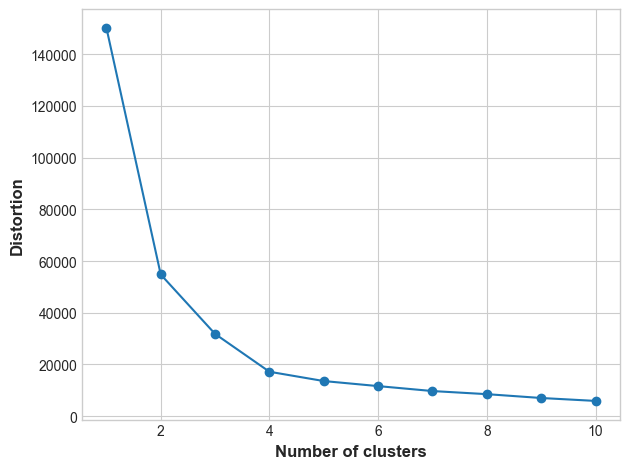

In [100]:
#plot the elbow plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()